# Is Tom Brady Really Clutch?

In this project we will attempt to answer the much debated question of whether Tom Brady is truly the most clutch Quarterback. We will do this within the parameters of our database which captures data from 2004-2019.

In [155]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We will fist create a SQLite Database from the csv files pulled from Kaggle.

In [ ]:
conn = sqlite3.connect('nfl.db')

folder_path = 'nfl'
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(folder_path, filename))

        table_name = filename[:-4]
        df.to_sql(table_name, conn, if_exists='replace', index=False)

In [132]:
conn = sqlite3.connect('nfl.db')

In [133]:
query = """
    SELECT 
        players.nameFull, 
        SUM(passer.passTD) AS fourth_quarter_td_count,
        SUM(passer.passLength) AS total_passing_yards
    FROM players
    INNER JOIN passer ON players.playerID = passer.playerID
    INNER JOIN plays ON passer.playID = plays.playID
    WHERE plays.quarter = 4 AND passer.passPosition = 'QB'
    GROUP BY players.playerID
    ORDER BY fourth_quarter_td_count DESC
    LIMIT 10
"""

TOTALS = pd.read_sql_query(query, conn)
TOTALS

,nameFull,fourth_quarter_td_count,total_passing_yards
0,Drew Brees,140,19270
1,Tom Brady,128,19361
2,Eli Manning,124,18694
3,Philip Rivers,111,19402
4,Aaron Rodgers,110,15523
5,Ben Roethlisberger,108,18189
6,Matt Ryan,95,16520
7,Russell Wilson,89,12452
8,Carson Palmer,86,14965
9,Peyton Manning,83,12342


In [134]:
TOTALS

,nameFull,fourth_quarter_td_count,total_passing_yards
0,Drew Brees,140,19270
1,Tom Brady,128,19361
2,Eli Manning,124,18694
3,Philip Rivers,111,19402
4,Aaron Rodgers,110,15523
5,Ben Roethlisberger,108,18189
6,Matt Ryan,95,16520
7,Russell Wilson,89,12452
8,Carson Palmer,86,14965
9,Peyton Manning,83,12342


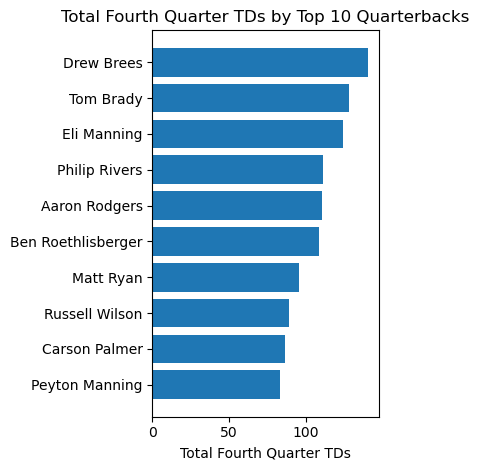

In [135]:
TOTALS = TOTALS.sort_values('fourth_quarter_td_count', ascending=False)

plt.subplot(1, 2, 2)
plt.barh(TOTALS['nameFull'][::-1], TOTALS['fourth_quarter_td_count'][::-1])
plt.xlabel('Total Fourth Quarter TDs')
plt.title('Total Fourth Quarter TDs by Top 10 Quarterbacks')

plt.tight_layout()
plt.show()

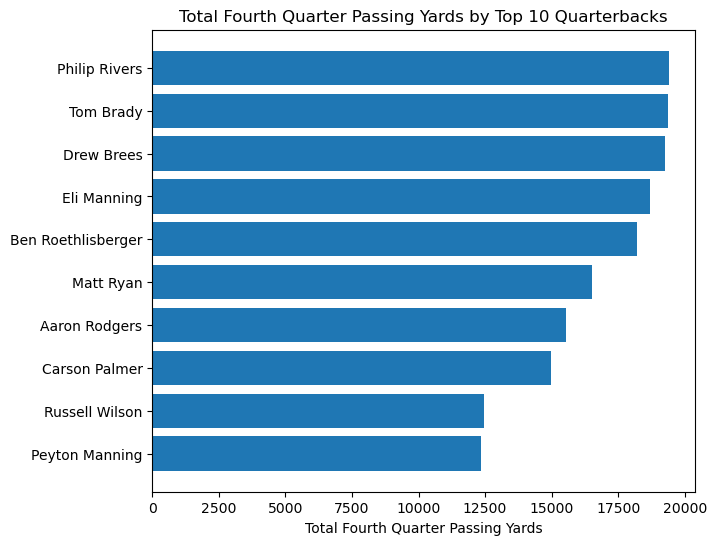

In [136]:
TOTALS = TOTALS.sort_values('total_passing_yards', ascending=False)
plt.figure(figsize=(7, 6))
plt.barh(TOTALS['nameFull'][::-1], TOTALS['total_passing_yards'][::-1])
plt.xlabel('Total Fourth Quarter Passing Yards')
plt.title('Total Fourth Quarter Passing Yards by Top 10 Quarterbacks')
plt.show()


From the bar chart above we can see that Tom Brady only comes in as the Quarterback with the second most touchdowns in the 4th quarter. As a Saints fan I'm happy to see Drew Brees is number one! When looking at the Passing Yards in the 4th quarter, we also see that Tom Brady is number two in this category as well. Although he doesn't claim first by either of these metrics, his high placement across both categories adds some credence to the notion that he is the most clutch 4th quarterback ever.

From the bar chart above we can see that Tom Brady only comes in as the Quarterback with the second most touchdowns in the 4th quarter. As a Saints fan I'm happy to see Drew Brees is number one! When looking at the Passing Yards in the 4th quarter, we also see that Tom Brady is number two in this category as well. Although he doesn't claim first by either of these metrics, his high placement across both categories adds some credence to the notion that he is the most clutch 4th quarterback ever.

In [137]:
qbs = ["Philip Rivers", "Tom Brady", "Drew Brees", "Eli Manning", 
       "Ben Roethlisberger", "Matt Ryan", "Aaron Rodgers", 
       "Carson Palmer", "Russell Wilson", "Peyton Manning"]

qb_str = ', '.join(f"'{qb}'" for qb in qbs)

query = f"""
    SELECT 
        players.nameFull, 
        SUM(passer.passTD) * 1.0 / COUNT(DISTINCT plays.gameID) AS avg_fourth_quarter_td_per_game,
        SUM(passer.passLength) * 1.0 / COUNT(DISTINCT plays.gameID) AS avg_passing_yards_per_game
    FROM players
    INNER JOIN passer ON players.playerID = passer.playerID
    INNER JOIN plays ON passer.playID = plays.playID
    WHERE plays.quarter = 4 
    AND passer.passPosition = 'QB'
    AND players.nameFull IN ({qb_str})
    GROUP BY players.playerID
    ORDER BY avg_fourth_quarter_td_per_game DESC
    LIMIT 10
"""
AVGs = pd.read_sql_query(query, conn)
AVGs

,nameFull,avg_fourth_quarter_td_per_game,avg_passing_yards_per_game
0,Russell Wilson,0.631206,88.312057
1,Aaron Rodgers,0.569948,80.430052
2,Drew Brees,0.549020,75.568627
3,Eli Manning,0.510288,76.930041
4,Matt Ryan,0.494792,86.041667
5,Philip Rivers,0.491150,85.849558
6,Carson Palmer,0.485876,84.548023
7,Tom Brady,0.484848,73.337121
8,Ben Roethlisberger,0.480000,80.840000
9,Peyton Manning,0.479769,71.341040


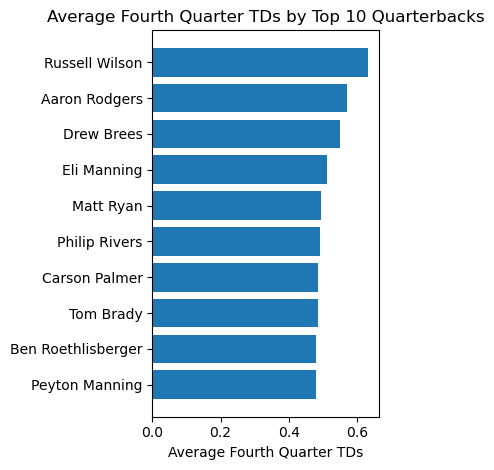

In [138]:
AVGs = AVGs.sort_values('avg_fourth_quarter_td_per_game', ascending=False)

plt.subplot(1, 2, 2)
plt.barh(AVGs['nameFull'][::-1], AVGs['avg_fourth_quarter_td_per_game'][::-1])
plt.xlabel('Average Fourth Quarter TDs')
plt.title('Average Fourth Quarter TDs by Top 10 Quarterbacks')

plt.tight_layout()
plt.show()

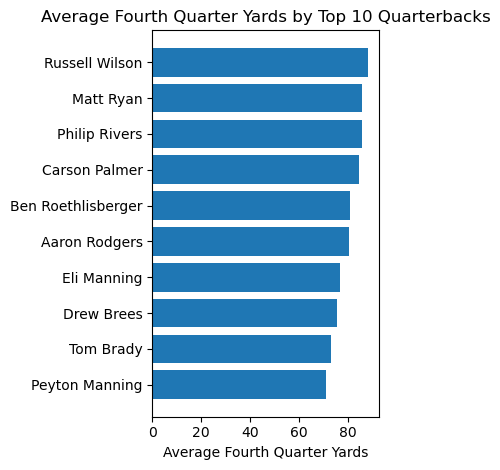

In [139]:
AVGs = AVGs.sort_values('avg_passing_yards_per_game', ascending=False)

plt.subplot(1, 2, 2)
plt.barh(AVGs['nameFull'][::-1], AVGs['avg_passing_yards_per_game'][::-1])
plt.xlabel('Average Fourth Quarter Yards')
plt.title('Average Fourth Quarter Yards by Top 10 Quarterbacks')

plt.tight_layout()
plt.show()

In [140]:
qb_str = ', '.join(f"'{qb}'" for qb in qbs)

query = f"""
    SELECT
        players.nameFull, 
        players.playerID, 
        gameParticipation.teamID, 
        gameParticipation.gameID,
        games.winningTeam,
        games.homeTeamId
    FROM players
    INNER JOIN gameParticipation ON players.playerID = gameParticipation.playerID
    INNER JOIN games ON gameParticipation.gameID = games.gameID
    WHERE players.nameFull IN ({qb_str})
"""

mat = pd.read_sql_query(query, conn)
mat


,nameFull,playerId,teamId,gameId,winningTeam,homeTeamId
0,Peyton Manning,19980001,1400,56183,1400,1400
1,Peyton Manning,19980001,1400,56183,1400,1400
2,Peyton Manning,19980001,1400,56183,1400,1400
3,Peyton Manning,19980001,1400,56197,1400,1400
4,Peyton Manning,19980001,1400,56197,1400,1400
...,...,...,...,...,...,...
1280,Russell Wilson,20120075,4600,58155,4500,4600
1281,Russell Wilson,20120075,4600,58159,4600,3700
1282,Russell Wilson,20120075,4600,58159,4600,3700
1283,Russell Wilson,20120075,4600,58163,1800,1800


From this we can create a new binary column to denote if the QB's team won the game. This will help us narrow the selected games for our next query, where we need to find games in which the QB's team was trailing going into the 4th quarter.

In [141]:
mat['Win'] = mat.apply(lambda row: 1 if row['teamId'] == row['winningTeam'] else 0, axis=1)
mat

,nameFull,playerId,teamId,gameId,winningTeam,homeTeamId,Win
0,Peyton Manning,19980001,1400,56183,1400,1400,1
1,Peyton Manning,19980001,1400,56183,1400,1400,1
2,Peyton Manning,19980001,1400,56183,1400,1400,1
3,Peyton Manning,19980001,1400,56197,1400,1400,1
4,Peyton Manning,19980001,1400,56197,1400,1400,1
...,...,...,...,...,...,...,...
1280,Russell Wilson,20120075,4600,58155,4500,4600,0
1281,Russell Wilson,20120075,4600,58159,4600,3700,1
1282,Russell Wilson,20120075,4600,58159,4600,3700,1
1283,Russell Wilson,20120075,4600,58163,1800,1800,0


Additionally scores are recorded in the plays table as home and away scores, so we need to find out if the team the QB in question is on is the home or away team. We can do this by seeing if the team ID matches the home team ID from the games table.

In [142]:
mat['Home'] = mat.apply(lambda row: 1 if row['teamId'] == row['homeTeamId'] else 0, axis=1)
mat

,nameFull,playerId,teamId,gameId,winningTeam,homeTeamId,Win,Home
0,Peyton Manning,19980001,1400,56183,1400,1400,1,1
1,Peyton Manning,19980001,1400,56183,1400,1400,1,1
2,Peyton Manning,19980001,1400,56183,1400,1400,1,1
3,Peyton Manning,19980001,1400,56197,1400,1400,1,1
4,Peyton Manning,19980001,1400,56197,1400,1400,1,1
...,...,...,...,...,...,...,...,...
1280,Russell Wilson,20120075,4600,58155,4500,4600,0,1
1281,Russell Wilson,20120075,4600,58159,4600,3700,1,0
1282,Russell Wilson,20120075,4600,58159,4600,3700,1,0
1283,Russell Wilson,20120075,4600,58163,1800,1800,0,0


To find which games out of the above that a QB's team was trailing in score going into the 4th quarter, we need to find the score at the end of the 3rd quarter. This can be found indirectly in the plays table. While we do not have columns that give the score for each team at the end of each quarter, we have a playID that enumerates as the game progresses, as well as a column denoting the quarter. We can simply find the largest play ID within the 3rd quarter of each game, and that will correspond to the last play of that quarter.

In [143]:
unique_game_ids = mat['gameId'].unique()
game_id_str = ', '.join(map(str, unique_game_ids))

In [144]:
query_last_play = f"""
    SELECT 
        gameID, 
        MAX(playSequence) as last_play_sequence
    FROM plays 
    WHERE gameID IN ({game_id_str}) AND quarter = 3
    GROUP BY gameID
"""
last_play_df = pd.read_sql_query(query_last_play, conn)
last_play_df

,gameId,last_play_sequence
0,56170,119
1,56171,123
2,56176,137
3,56179,128
4,56183,126
...,...,...
404,58157,112
405,58158,116
406,58159,121
407,58163,116


Next we need to find pull the scores for the teams after the 3rd quarter concluded. If we see that the selected QBs team was trailing at the end of the 3rd quarter but ended up winning the game, we count that as a come from behind win. To do this we first need to take all the game and play IDs and find the corresponding scores.

In [145]:
last_play_game_ids = ', '.join(map(str, last_play_df['gameId'].tolist()))
last_play_sequence = ', '.join(map(str, last_play_df['last_play_sequence'].tolist()))

In [146]:
query_scores = f"""
    SELECT
        gameID, 
        homeScorePost, 
        visitingScorePost
    FROM plays 
    WHERE gameID IN ({last_play_game_ids}) 
    AND playSequence IN ({last_play_sequence})
"""
scores_df = pd.read_sql_query(query_scores, conn)
scores_df = scores_df.drop_duplicates(subset='gameId', keep='first')
scores_df

,gameId,homeScorePost,visitingScorePost
0,56170,20,10
46,56171,17,20
92,56176,10,20
138,56179,27,10
184,56183,24,7
...,...,...,...
18406,58157,13,14
18450,58158,10,13
18496,58159,6,16
18542,58163,28,10


In [147]:
conn.close()

Now that we have the scores we simply need to join them to our original table.

In [148]:
final_df = mat.merge(scores_df, on='gameId', how='inner')
final_df

,nameFull,playerId,teamId,gameId,winningTeam,homeTeamId,Win,Home,homeScorePost,visitingScorePost
0,Peyton Manning,19980001,1400,56183,1400,1400,1,1,24,7
1,Peyton Manning,19980001,1400,56183,1400,1400,1,1,24,7
2,Peyton Manning,19980001,1400,56183,1400,1400,1,1,24,7
3,Peyton Manning,19980001,1400,56197,1400,1400,1,1,21,10
4,Peyton Manning,19980001,1400,56197,1400,1400,1,1,21,10
...,...,...,...,...,...,...,...,...,...,...
1280,Russell Wilson,20120075,4600,58137,3800,4600,0,1,7,20
1281,Russell Wilson,20120075,4600,58155,4500,4600,0,1,7,19
1282,Russell Wilson,20120075,4600,58155,4500,4600,0,1,7,19
1283,Russell Wilson,20120075,4600,58159,4600,3700,1,0,6,16


In [149]:
print(final_df.homeScorePost.isnull().sum())
print(final_df.visitingScorePost.isnull().sum())

0
0


Each score for every game is non-null, so we don't have any games without scores.

Now that we have the scores for the home and away teams, we need to identify whether the QB was on the home or away team. We will do this by creating a conditional column that has the home team score if the value in the home column is equal to 1, and the away team score when home is 0. We also create another column to compare against using the inverse logic for the opposition team.

In [150]:
final_df['QB_teamscore'] = np.where(final_df['Home'] == 1, final_df['homeScorePost'], final_df['visitingScorePost'])
final_df['other_teamscore'] = np.where(final_df['Home'] == 1, final_df['visitingScorePost'], final_df['homeScorePost'])
final_df

,nameFull,playerId,teamId,gameId,winningTeam,homeTeamId,Win,Home,homeScorePost,visitingScorePost,QB_teamscore,other_teamscore
0,Peyton Manning,19980001,1400,56183,1400,1400,1,1,24,7,24,7
1,Peyton Manning,19980001,1400,56183,1400,1400,1,1,24,7,24,7
2,Peyton Manning,19980001,1400,56183,1400,1400,1,1,24,7,24,7
3,Peyton Manning,19980001,1400,56197,1400,1400,1,1,21,10,21,10
4,Peyton Manning,19980001,1400,56197,1400,1400,1,1,21,10,21,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1280,Russell Wilson,20120075,4600,58137,3800,4600,0,1,7,20,7,20
1281,Russell Wilson,20120075,4600,58155,4500,4600,0,1,7,19,7,19
1282,Russell Wilson,20120075,4600,58155,4500,4600,0,1,7,19,7,19
1283,Russell Wilson,20120075,4600,58159,4600,3700,1,0,6,16,16,6


We can drop the original score columns since these are captured in our newly created columns.

In [151]:
final_df = final_df.drop(['homeScorePost', 'visitingScorePost'], axis=1)
final_df

,nameFull,playerId,teamId,gameId,winningTeam,homeTeamId,Win,Home,QB_teamscore,other_teamscore
0,Peyton Manning,19980001,1400,56183,1400,1400,1,1,24,7
1,Peyton Manning,19980001,1400,56183,1400,1400,1,1,24,7
2,Peyton Manning,19980001,1400,56183,1400,1400,1,1,24,7
3,Peyton Manning,19980001,1400,56197,1400,1400,1,1,21,10
4,Peyton Manning,19980001,1400,56197,1400,1400,1,1,21,10
...,...,...,...,...,...,...,...,...,...,...
1280,Russell Wilson,20120075,4600,58137,3800,4600,0,1,7,20
1281,Russell Wilson,20120075,4600,58155,4500,4600,0,1,7,19
1282,Russell Wilson,20120075,4600,58155,4500,4600,0,1,7,19
1283,Russell Wilson,20120075,4600,58159,4600,3700,1,0,16,6


The last step is to create another conditional column that denotes whether a QB had a come-from-behind-win, which will be positive when Win = 1 and the QB_teamscore > other_teamscore. We can then count all instances where this happens for each QB to get the summation of their come-from-behind-wins.

In [152]:
final_df['Win_Behind'] = np.where((final_df['Win'] == 1) & (final_df['QB_teamscore'] < final_df['other_teamscore'] ), 1, 0)
final_df

,nameFull,playerId,teamId,gameId,winningTeam,homeTeamId,Win,Home,QB_teamscore,other_teamscore,Win_Behind
0,Peyton Manning,19980001,1400,56183,1400,1400,1,1,24,7,0
1,Peyton Manning,19980001,1400,56183,1400,1400,1,1,24,7,0
2,Peyton Manning,19980001,1400,56183,1400,1400,1,1,24,7,0
3,Peyton Manning,19980001,1400,56197,1400,1400,1,1,21,10,0
4,Peyton Manning,19980001,1400,56197,1400,1400,1,1,21,10,0
...,...,...,...,...,...,...,...,...,...,...,...
1280,Russell Wilson,20120075,4600,58137,3800,4600,0,1,7,20,0
1281,Russell Wilson,20120075,4600,58155,4500,4600,0,1,7,19,0
1282,Russell Wilson,20120075,4600,58155,4500,4600,0,1,7,19,0
1283,Russell Wilson,20120075,4600,58159,4600,3700,1,0,16,6,0


In [153]:
agg_df = final_df.groupby('nameFull')['Win_Behind'].sum().reset_index()
agg_df = agg_df.sort_values(by='Win_Behind', ascending=False)
agg_df

,nameFull,Win_Behind
9,Tom Brady,24
0,Aaron Rodgers,22
1,Ben Roethlisberger,22
8,Russell Wilson,21
3,Drew Brees,16
5,Matt Ryan,13
7,Philip Rivers,12
2,Carson Palmer,11
4,Eli Manning,6
6,Peyton Manning,3


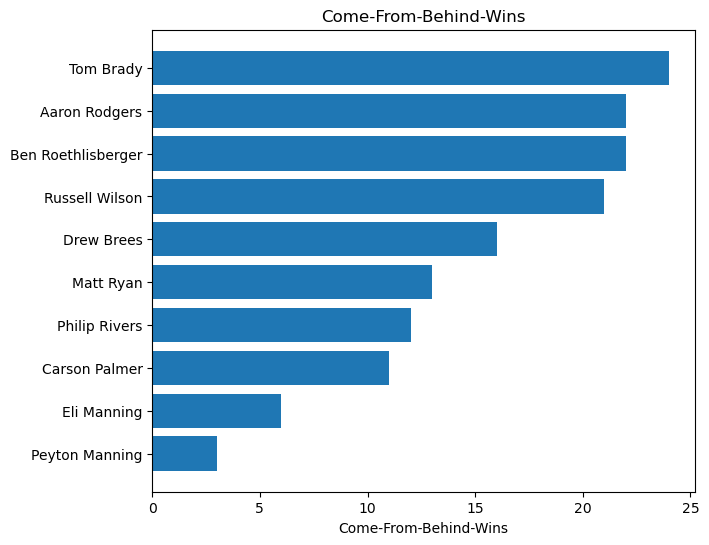

In [154]:
plt.figure(figsize=(7, 6))
plt.barh(agg_df['nameFull'][::-1], agg_df['Win_Behind'][::-1])
plt.xlabel('Come-From-Behind-Wins')
plt.title('Come-From-Behind-Wins')
plt.show()

## Conclusion

The goal of this analysis was to try and find out who the most "clutch" QB was during the time period of our data (2003-2019). A QB is considered clutch when they are under pressure to perform, and that pressure is most usually at its height during the final quarter of the game. For our analysis we looked at both a QB's touchdowns as well as their passing yards during 4th quarters. Looking at the totals for these we saw that Tom Brady was only the second best in both of these categories. Although he did not take first in either measure, his consistency in the number two spot and close proximity to the stats of the number one QB indicated that he performed at a very high level in the 4th quarter consistently. When looking at the averages for these however, Brady drops significantly in the rankings, coming in second to last for yards and seventh for TDs per game. The discrepancy between the summation and average is most likely due to Brady having played many more games than his peers. It should be noted that neither the sums or averages alone are sufficient indicators. For instance, although Brady trails in averages, he has played many more games and is much older than leader in both categories, Russel Wilson. Wilson has played far fewer seasons and has thus not yet experienced the decrease in performance that most players have over time. Thus when looking at these simple statistics, it is not clear that Tom Brady is or is not the most clutch QB in the NFL.

To get a better idea of this, as a measure of ultimate "clutchness" we looked at the number of games a QB won when trailing going into the 4th quarter. As previously discussed, winning from behind is a key indicator that a QB is able to perform well even under unfavorable conditions. From this we were able to see that while still not number one, Brady had a high number of come from behind wins. From what we have seen in both the summation and averages as well as come-from-behind-wins, one could make a strong case that from the data provided during the period of 2004-2019, Russel Wilson was actually the most clutch quarter back. This cannot be decisively stated, but it is clear at least from this data set that Tom Brady was not the most clutch QB by metrics. With all the information gathered from the data at hand, we can definitively say that Tom Brady is a clutch QB. There does not seem to be sufficient evidence to state that he is the "most" clutch QB, but his high ranking throughout the numerous metrics calculated point to the idea that he is an elite QB during the 4th quarter.